In [48]:
#load the dataset
import pandas as pd
file_path = '/content/drive/My Drive/bike_sales.csv'
df = pd.read_csv(file_path)


In [49]:
#displays the first 5 rows of the DataFrame
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Rating,Shipping_Weight,Delivery_Time,Discount,Eco_Friendly,Shipping_Cost,Shipping_Company,Shipping_Type,Insurance,Return_Policy
0,2017-11-26,26,November,2017,19,Youth (<25),M,Canada,British Columbia,Accessories,...,4,13.25,2,25,True,40.58,GLS,Standard,Basic,30 Days
1,2014-11-26,26,November,2014,19,Youth (<25),M,Canada,British Columbia,Accessories,...,5,4.56,4,1,True,95.32,Posti,Same Day,NaN,30 Days
2,2019-03-23,23,March,2019,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,3,8.97,1,0,True,74.54,GLS,Express,Premium,7 Days
3,2015-03-23,23,March,2015,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,5,2.56,1,10,False,61.87,DHL,Same Day,NaN,7 Days
4,2018-05-15,15,May,2018,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,5,11.21,1,6,False,19.82,GLS,Same Day,Basic,30 Days


In [50]:
#display info about dataframe
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Rating,Shipping_Weight,Delivery_Time,Discount,Shipping_Cost
count,226072.000000,226072.000000,226072.000000,226072.000000,226072.000000,226072.000000,226072.000000,226072.000000,226072.000000,226072.000000,226072.000000,226072.000000,226072.000000,226072.000000
mean,15.665753,2017.992887,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360,3.005724,7.748286,5.001009,14.488172,52.471199
std,8.781547,3.163415,11.021911,9.561836,549.834267,922.069180,453.886439,884.864161,1309.091778,1.416783,4.185197,2.579064,8.631218,27.398519
min,1.000000,2013.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000,1.000000,0.500000,1.000000,0.000000,5.000000
25%,8.000000,2015.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000,2.000000,4.120000,3.000000,7.000000,28.700000
50%,16.000000,2018.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000,3.000000,7.750000,5.000000,15.000000,52.580000
75%,23.000000,2021.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000,4.000000,11.360000,7.000000,22.000000,76.230000
max,31.000000,2023.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000,5.000000,15.000000,9.000000,29.000000,100.000000


In [51]:
#check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226072 entries, 0 to 226071
Data columns (total 33 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              226072 non-null  object 
 1   Day               226072 non-null  int64  
 2   Month             226072 non-null  object 
 3   Year              226072 non-null  int64  
 4   Customer_Age      226072 non-null  int64  
 5   Age_Group         226072 non-null  object 
 6   Customer_Gender   226072 non-null  object 
 7   Country           226072 non-null  object 
 8   State             226072 non-null  object 
 9   Product_Category  226072 non-null  object 
 10  Sub_Category      226072 non-null  object 
 11  Product           226072 non-null  object 
 12  Order_Quantity    226072 non-null  int64  
 13  Unit_Cost         226072 non-null  int64  
 14  Unit_Price        226072 non-null  int64  
 15  Profit            226072 non-null  int64  
 16  Cost              22


Convert the 'Date' column object datatype to dateTime datatype

In [52]:
df['Date'] = pd.to_datetime(df['Date'])

## Dropping Columns

The following columns are being dropped from the DataFrame because they are not used in the subsequent steps for time series aggregation, feature engineering, or model training. Removing these columns helps simplify the DataFrame and potentially improve processing efficiency.

In [53]:
# Droping columns
columns_to_drop = [
    'Day',
    'Year',
    'Month', # Original Month column
    'Customer_Age',
    'Size',
    'Color',
    'Material',
    'Warranty',
    'Manufacturer',
    'Rating',
    'Shipping_Weight',
    'Delivery_Time',
    'Discount',
    'Eco_Friendly',
    'Shipping_Cost',
    'Shipping_Company',
    'Shipping_Type',
    'Insurance',
    'Return_Policy'
]

df = df.drop(columns=columns_to_drop, errors='ignore') # Use errors='ignore' to avoid errors if a column is already dropped or

Extract month and year, and aggregate sales data by month to create a time series.

In [54]:
df['OrderMonth'] = df['Date'].dt.to_period('M')

monthly_aggregated_sales = df.groupby('OrderMonth').agg(
    MonthlyQuantity=('Order_Quantity', 'sum'),
    MonthlyRevenue=('Revenue', 'sum')
).reset_index()

monthly_aggregated_sales['OrderMonth'] = monthly_aggregated_sales['OrderMonth'].astype(str)

monthly_aggregated_sales.head()

,OrderMonth,MonthlyQuantity,MonthlyRevenue
0,2013-01,19100,1203498
1,2013-02,19704,1197300
2,2013-03,19158,1371172
3,2013-04,22796,1363778
4,2013-05,22748,1735064


Visualize the monthly aggregated sales data to observe trends and seasonality, which can give insights into the suitability for linear regression and potential feature engineering needs.

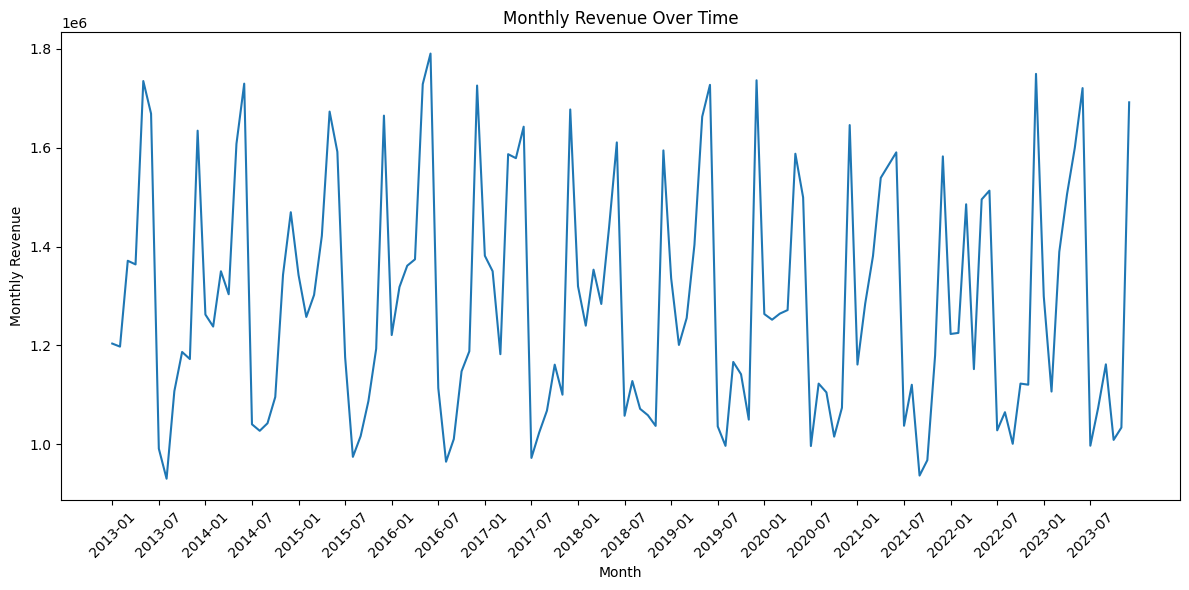

In [55]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))
plt.plot(monthly_aggregated_sales['OrderMonth'], monthly_aggregated_sales['MonthlyRevenue'])
plt.xlabel('Month')
plt.ylabel('Monthly Revenue')
plt.title('Monthly Revenue Over Time')

# Show only every 6th month or every 12th month
plt.xticks(monthly_aggregated_sales['OrderMonth'][::6], rotation=45)  # Every 6th month
# or
# plt.xticks(monthly_aggregated_sales['OrderMonth'][::12], rotation=45)  # Every 12th month

plt.tight_layout()
plt.show()

## Data Preparation for Linear Regression
Prepare the monthly aggregated sales data for linear regression by creating lagged features.

Create additional lagged features for 'MonthlyQuantity' and 'MonthlyRevenue' up to 3 lags, extract month for seasonal features, and handle NaN values resulting from lagging.

In [56]:
n_lags = 3
for i in range(1, n_lags + 1):
    monthly_aggregated_sales[f'MonthlyQuantity_lag_{i}'] = monthly_aggregated_sales['MonthlyQuantity'].shift(i)
    monthly_aggregated_sales[f'MonthlyRevenue_lag_{i}'] = monthly_aggregated_sales['MonthlyRevenue'].shift(i)

monthly_aggregated_sales['Month'] = pd.to_datetime(monthly_aggregated_sales['OrderMonth']).dt.month

monthly_aggregated_sales.dropna(inplace=True)

monthly_aggregated_sales.head()

,OrderMonth,MonthlyQuantity,MonthlyRevenue,MonthlyQuantity_lag_1,MonthlyRevenue_lag_1,MonthlyQuantity_lag_2,MonthlyRevenue_lag_2,MonthlyQuantity_lag_3,MonthlyRevenue_lag_3,Month
3,2013-04,22796,1363778,19158.0,1371172.0,19704.0,1197300.0,19100.0,1203498.0,4
4,2013-05,22748,1735064,22796.0,1363778.0,19158.0,1371172.0,19704.0,1197300.0,5
5,2013-06,23128,1669026,22748.0,1735064.0,22796.0,1363778.0,19158.0,1371172.0,6
6,2013-07,14484,990734,23128.0,1669026.0,22748.0,1735064.0,22796.0,1363778.0,7
7,2013-08,19780,929812,14484.0,990734.0,23128.0,1669026.0,22748.0,1735064.0,8


Apply one-hot encoding to the 'Month' column to create seasonal features and explore other potential categorical features from the original dataframe for aggregation.


In [57]:
monthly_aggregated_sales = pd.get_dummies(monthly_aggregated_sales, columns=['Month'], prefix='Month')

# Explore potential categorical features from the original dataframe
print("Value counts for potential categorical features in the original dataframe:")
for col in ['Product_Category', 'Country', 'Age_Group', 'Customer_Gender']:
    if col in df.columns:
        print(f"\n{col}:\n{df[col].value_counts().head()}") # Display top 5 for brevity

Value counts for potential categorical features in the original dataframe:

Product_Category:
Product_Category
Accessories    140240
Bikes           51964
Clothing        33868
Name: count, dtype: int64

Country:
Country
United States     78401
Australia         47868
Canada            28356
United Kingdom    27237
Germany           22192
Name: count, dtype: int64

Age_Group:
Age_Group
Adults (35-64)          111648
Young Adults (25-34)     77308
Youth (<25)              35656
Seniors (64+)             1460
Name: count, dtype: int64

Customer_Gender:
Customer_Gender
M    116624
F    109448
Name: count, dtype: int64


Aggregate relevant categorical features by 'OrderMonth' and merge them with the monthly aggregated sales data. Given the variety and potential high cardinality of some categorical features like 'Country' and 'Product_Category', one-hot encoding directly on the original dataframe and then aggregating might be computationally expensive and result in too many features. A better approach is to aggregate by 'OrderMonth' and potentially calculate the mode of the categorical features for each month or focus on features with fewer unique values like 'Customer_Gender' and 'Age_Group' for one-hot encoding on the aggregated level.

In [58]:
# Aggregate categorical features by OrderMonth
monthly_categorical_features = df.groupby('OrderMonth').agg(
    Dominant_Product_Category=('Product_Category', lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'),
    Dominant_Country=('Country', lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'),
    Dominant_Age_Group=('Age_Group', lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'),
    Dominant_Customer_Gender=('Customer_Gender', lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')
).reset_index()

monthly_categorical_features['OrderMonth'] = monthly_categorical_features['OrderMonth'].astype(str)

# Merge with monthly aggregated sales
monthly_aggregated_sales = pd.merge(monthly_aggregated_sales, monthly_categorical_features, on='OrderMonth', how='left')

# One-hot encode the dominant categorical features at the aggregated level
monthly_aggregated_sales = pd.get_dummies(monthly_aggregated_sales, columns=['Dominant_Product_Category', 'Dominant_Country', 'Dominant_Age_Group', 'Dominant_Customer_Gender'], prefix='Dominant')

# Handle any remaining NaN values after merge (should be none if merge is successful but good practice)
monthly_aggregated_sales.dropna(inplace=True)

display(monthly_aggregated_sales.head())

,OrderMonth,MonthlyQuantity,MonthlyRevenue,MonthlyQuantity_lag_1,MonthlyRevenue_lag_1,MonthlyQuantity_lag_2,MonthlyRevenue_lag_2,MonthlyQuantity_lag_3,MonthlyRevenue_lag_3,Month_1,...,Month_8,Month_9,Month_10,Month_11,Month_12,Dominant_Accessories,Dominant_United States,Dominant_Adults (35-64),Dominant_F,Dominant_M
0,2013-04,22796,1363778,19158.0,1371172.0,19704.0,1197300.0,19100.0,1203498.0,False,...,False,False,False,False,False,True,True,True,False,True
1,2013-05,22748,1735064,22796.0,1363778.0,19158.0,1371172.0,19704.0,1197300.0,False,...,False,False,False,False,False,True,True,True,False,True
2,2013-06,23128,1669026,22748.0,1735064.0,22796.0,1363778.0,19158.0,1371172.0,False,...,False,False,False,False,False,True,True,True,False,True
3,2013-07,14484,990734,23128.0,1669026.0,22748.0,1735064.0,22796.0,1363778.0,False,...,False,False,False,False,False,True,True,True,False,True
4,2013-08,19780,929812,14484.0,990734.0,23128.0,1669026.0,22748.0,1735064.0,False,...,True,False,False,False,False,True,True,True,True,False


## Build and Evaluate Linear Regression Model
Build a linear regression model using the prepared data and evaluate its performance.

Split the data into training and testing sets, train a linear regression model on the training data using the lagged features as predictors and monthly revenue as the target, and evaluate the model's performance on the testing data using relevant metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [60]:
# Define features (all columns except 'OrderMonth', 'MonthlyQuantity', and 'MonthlyRevenue') and target ('MonthlyRevenue')
features = [col for col in monthly_aggregated_sales.columns if col not in ['OrderMonth', 'MonthlyQuantity', 'MonthlyRevenue']]
target = 'MonthlyRevenue'

X = monthly_aggregated_sales[features]
y = monthly_aggregated_sales[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the Linear Regression model with expanded features
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lr_model.predict(X_test)

# Evaluate the model
lr_mae = mean_absolute_error(y_test, y_pred)
lr_mse= mean_squared_error(y_test, y_pred)
lr_r2= r2_score(y_test, y_pred)

print(f"Linear Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {lr_mae}")
print(f"Mean Squared Error (MSE): {lr_mse}")
print(f"R-squared (R2): {lr_r2}")

Linear Regression Model Performance:
Mean Absolute Error (MAE): 76954.91669327581
Mean Squared Error (MSE): 8955487080.353619
R-squared (R2): 0.8503501217583782


### Comparing Actual and Predicted Monthly Revenue

,Actual Monthly Revenue,Predicted Monthly Revenue,OrderMonth
103,1179204,1.113935e+06,2021-11
104,1582524,1.651225e+06,2021-12
105,1222918,1.309102e+06,2022-01
106,1225086,1.246742e+06,2022-02
107,1485540,1.306629e+06,2022-03
108,1151802,1.386288e+06,2022-04
109,1495420,1.590075e+06,2022-05
110,1513164,1.671965e+06,2022-06
111,1027784,1.069764e+06,2022-07
112,1064512,1.050578e+06,2022-08


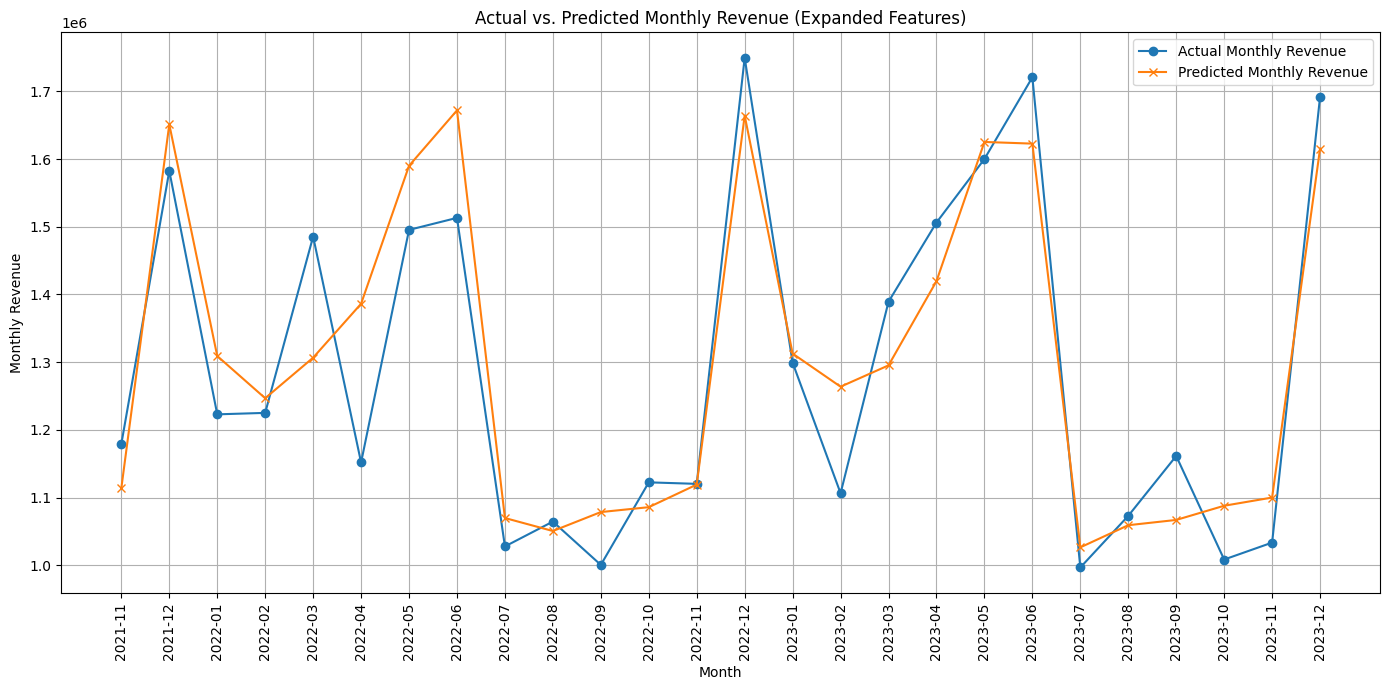

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame for actual vs. predicted values
actual_vs_predicted_df = pd.DataFrame({'Actual Monthly Revenue': y_test, 'Predicted Monthly Revenue': y_pred})

# Add the OrderMonth for context (assuming X_test_expanded has the same index as y_test_expanded)
# We need to get the corresponding OrderMonth from the original monthly_aggregated_sales DataFrame
# The indices of y_test_expanded correspond to the indices of the split monthly_aggregated_sales
actual_vs_predicted_df['OrderMonth'] = monthly_aggregated_sales.loc[y_test.index, 'OrderMonth'].values

display(actual_vs_predicted_df)

# Plotting actual vs. predicted monthly revenue
plt.figure(figsize=(14, 7))
plt.plot(actual_vs_predicted_df['OrderMonth'], actual_vs_predicted_df['Actual Monthly Revenue'], label='Actual Monthly Revenue', marker='o')
plt.plot(actual_vs_predicted_df['OrderMonth'], actual_vs_predicted_df['Predicted Monthly Revenue'], label='Predicted Monthly Revenue', marker='x')
plt.xlabel('Month')
plt.ylabel('Monthly Revenue')
plt.title('Actual vs. Predicted Monthly Revenue (Expanded Features)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Revenue Forecasting (2024-2026)

In [62]:
import numpy as np
from datetime import datetime
from pandas.tseries.offsets import MonthEnd

# Get last known month and prepare a base for next 24 months
last_month = pd.to_datetime(monthly_aggregated_sales['OrderMonth'].max())
future_months = [(last_month + MonthEnd(i)).to_period('M').strftime('%Y-%m') for i in range(1, 25)]

# Create a new DataFrame for 24 future months
future_data = pd.DataFrame({'OrderMonth': future_months})

# Initialize lag values from the most recent 3 months
for i in range(1, 4):
    future_data[f'MonthlyQuantity_lag_{i}'] = monthly_aggregated_sales['MonthlyQuantity'].values[-i]
    future_data[f'MonthlyRevenue_lag_{i}'] = monthly_aggregated_sales['MonthlyRevenue'].values[-i]

# Extract month and one-hot encode it
future_data['Month'] = pd.to_datetime(future_data['OrderMonth']).dt.month
future_data = pd.get_dummies(future_data, columns=['Month'], prefix='Month')

# Ensure future data has the same one-hot encoded month columns as training
for col in [c for c in X.columns if c.startswith('Month_')]:
    if col not in future_data.columns:
        future_data[col] = 0

# Use dominant categorical modes from the last known data
last_row = monthly_aggregated_sales.iloc[-1]
for col in [c for c in X.columns if c.startswith('Dominant_')]:
    future_data[col] = last_row[col]

# Reorder columns to match training features
future_data = future_data[X.columns]

# Predict future revenue
future_preds = lr_model.predict(future_data)

# Combine predictions with future months
forecast_df = pd.DataFrame({
    'OrderMonth': future_months,
    'Forecasted_Monthly_Revenue': np.round(future_preds, 2)
})

display(forecast_df)




,OrderMonth,Forecasted_Monthly_Revenue
0,2023-12,1719673.06
1,2024-01,1318706.07
2,2024-02,1313100.53
3,2024-03,1486417.52
4,2024-04,1506537.55
5,2024-05,1679964.30
6,2024-06,1700857.09
7,2024-07,1114541.79
8,2024-08,1230080.95
9,2024-09,1269142.39


## Plotting Historical vs Forecasted Revenue

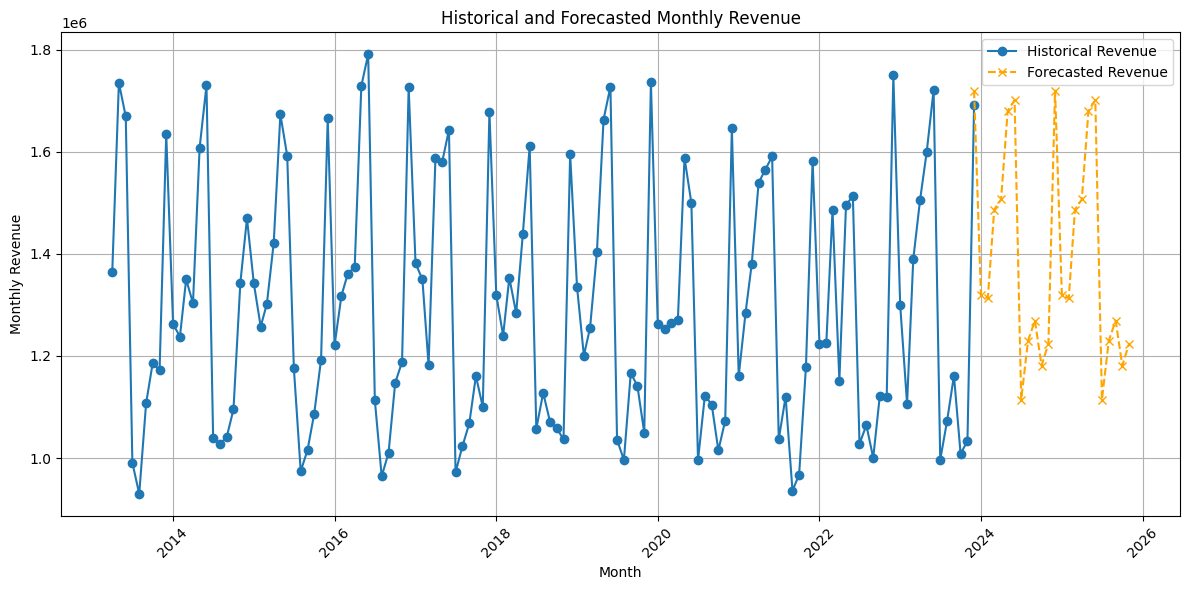

In [63]:
import matplotlib.pyplot as plt

# Ensure 'OrderMonth' is in datetime format for sorting
monthly_aggregated_sales['OrderMonth'] = pd.to_datetime(monthly_aggregated_sales['OrderMonth'])
forecast_df['OrderMonth'] = pd.to_datetime(forecast_df['OrderMonth'])

# Combine historical and forecasted data
combined_df = pd.concat([
    monthly_aggregated_sales[['OrderMonth', 'MonthlyRevenue']].rename(columns={'MonthlyRevenue': 'Revenue'}),
    forecast_df.rename(columns={'Forecasted_Monthly_Revenue': 'Revenue'})
])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_aggregated_sales['OrderMonth'], monthly_aggregated_sales['MonthlyRevenue'],
         label='Historical Revenue', marker='o')
plt.plot(forecast_df['OrderMonth'], forecast_df['Forecasted_Monthly_Revenue'],
         label='Forecasted Revenue', marker='x', linestyle='--', color='orange')

plt.xlabel('Month')
plt.ylabel('Monthly Revenue')
plt.title('Historical and Forecasted Monthly Revenue')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

